In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
df=pd.read_csv('/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [7]:
df.shape

(1511, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [11]:
#df.loc[0,'Date'].day_name() # error 'str' object has no attribute 'day_name'

In [15]:
# to convert from str to datetime 
# 4/1/2015 16:00:00 
df['Date']=pd.to_datetime(df['Date'] , format='%m%d%Y %H:%M:%S')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [17]:
df.loc[0,'Date'].day_name()

'Wednesday'

In [19]:
df['dayname']=df['Date'].dt.day_name() # .dt to apply it on all series Date 

In [20]:
df

,Date,Open,High,Low,Close,Volume,dayname
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,Wednesday
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,Thursday
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,Monday
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,Tuesday
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,Wednesday
...,...,...,...,...,...,...,...
1506,2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,Thursday
1507,2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,Friday
1508,2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,Monday
1509,2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012,Tuesday


In [21]:
df['Date'].min()  # the oldest date

Timestamp('2015-04-01 16:00:00')

In [22]:
df['Date'].max() # the newest date

Timestamp('2021-03-31 16:00:00')

In [23]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [24]:
df['Date'].max()-df['Date'].min()

Timedelta('2191 days 00:00:00')

In [26]:
df[(df['Date'] > '2020') & (df['Date'] <'2021')]

,Date,Open,High,Low,Close,Volume,dayname
1197,2020-01-02 16:00:00,158.78,160.73,158.33,160.62,22634546,Thursday
1198,2020-01-03 16:00:00,158.32,159.95,158.06,158.62,21121681,Friday
1199,2020-01-06 16:00:00,157.08,159.10,156.51,159.03,20826702,Monday
1200,2020-01-07 16:00:00,159.32,159.67,157.32,157.58,21881740,Tuesday
1201,2020-01-08 16:00:00,158.93,160.80,157.95,160.09,27762026,Wednesday
...,...,...,...,...,...,...,...
1445,2020-12-24 13:00:00,221.42,223.61,221.20,222.75,10550572,Thursday
1446,2020-12-28 16:00:00,224.45,226.03,223.02,224.96,17933496,Monday
1447,2020-12-29 16:00:00,226.31,227.18,223.58,224.15,17403213,Tuesday
1448,2020-12-30 16:00:00,225.23,225.63,221.47,221.68,20272337,Wednesday


In [29]:
df.set_index('Date',inplace=True)

In [30]:
df

,Open,High,Low,Close,Volume,dayname
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,Wednesday
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,Thursday
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,Monday
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,Tuesday
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,Wednesday
...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,Thursday
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,Friday
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,Monday


In [32]:
df.loc['2021']

,Open,High,Low,Close,Volume,dayname
Date,,,,,,
2021-01-04 16:00:00,222.53,223.00,214.81,217.69,37130139,Monday
2021-01-05 16:00:00,217.26,218.52,215.70,217.90,23822953,Tuesday
2021-01-06 16:00:00,212.17,216.49,211.94,212.25,35930653,Wednesday
2021-01-07 16:00:00,214.04,219.34,213.71,218.29,27694480,Thursday
2021-01-08 16:00:00,218.68,220.58,217.03,219.62,22956206,Friday
...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,Thursday
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,Friday
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,Monday


In [33]:
df.loc['2020-02':'2021-02']

,Open,High,Low,Close,Volume,dayname
Date,,,,,,
2020-02-03 16:00:00,170.43,174.50,170.40,174.38,30149052,Monday
2020-02-04 16:00:00,177.14,180.64,176.31,180.12,36433339,Tuesday
2020-02-05 16:00:00,184.03,184.20,178.41,179.90,39186324,Wednesday
2020-02-06 16:00:00,180.97,183.82,180.06,183.63,27751381,Thursday
2020-02-07 16:00:00,182.85,185.63,182.48,183.89,33529074,Friday
...,...,...,...,...,...,...
2021-02-22 16:00:00,237.42,237.93,232.40,234.51,36446936,Monday
2021-02-23 16:00:00,230.33,234.83,228.73,233.27,30228704,Tuesday
2021-02-24 16:00:00,230.01,235.20,229.00,234.55,26339746,Wednesday


In [35]:
df.loc['2021-02'].Close.mean()

240.0668421052632

<Axes: xlabel='Date'>

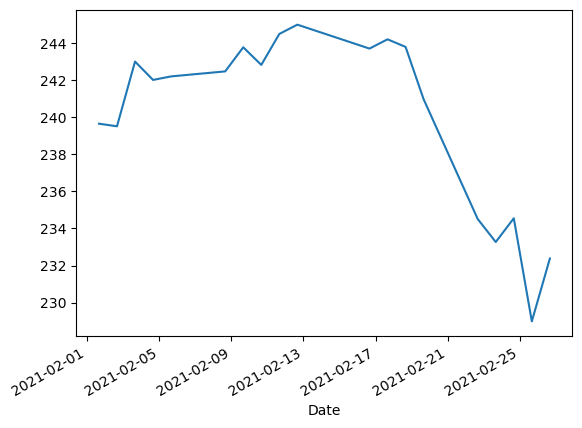

In [36]:
df.loc['2021-02'].Close.plot()

In [37]:
df['High']

Date
2015-04-01 16:00:00     40.76
2015-04-02 16:00:00     40.74
2015-04-06 16:00:00     41.78
2015-04-07 16:00:00     41.91
2015-04-08 16:00:00     41.69
                        ...  
2021-03-25 16:00:00    236.94
2021-03-26 16:00:00    236.71
2021-03-29 16:00:00    236.80
2021-03-30 16:00:00    233.85
2021-03-31 16:00:00    239.10
Name: High, Length: 1511, dtype: float64

In [38]:
df['High'].resample('M').max()

Date
2015-04-30     49.54
2015-05-31     48.91
2015-06-30     47.77
2015-07-31     47.40
2015-08-31     48.41
               ...  
2020-11-30    228.12
2020-12-31    227.18
2021-01-31    242.64
2021-02-28    246.13
2021-03-31    241.05
Freq: M, Name: High, Length: 72, dtype: float64

In [39]:
df['High'].resample('W').mean()

Date
2015-04-05     40.750000
2015-04-12     41.790000
2015-04-19     42.126000
2015-04-26     44.240000
2015-05-03     49.014000
                 ...    
2021-03-07    234.822000
2021-03-14    236.148000
2021-03-21    236.092000
2021-03-28    237.920000
2021-04-04    236.583333
Freq: W-SUN, Name: High, Length: 314, dtype: float64

<Axes: xlabel='Date'>

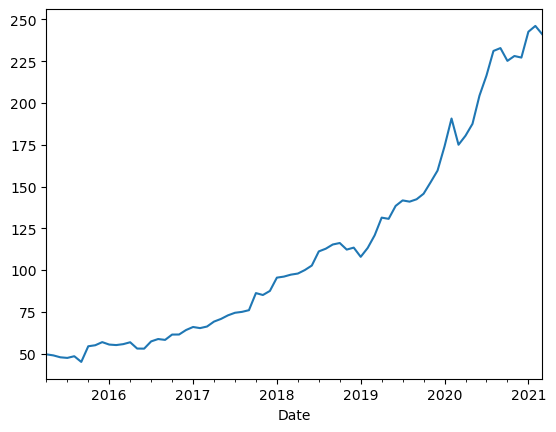

In [40]:
df['High'].resample('M').max().plot()

In [41]:
df.resample('M').agg({'Open' : 'mean','High':'max' ,'Low':'min','Volume':'sum'})

,Open,High,Low,Volume
Date,,,,
2015-04-30,43.070952,49.54,40.12,874535095
2015-05-31,47.590000,48.91,46.02,633072750
2015-06-30,46.104545,47.77,43.94,664853340
2015-07-31,45.484545,47.40,43.32,725458102
2015-08-31,45.541905,48.41,39.72,776497465
...,...,...,...,...
2020-11-30,214.210000,228.12,200.12,573474483
2020-12-31,217.612727,227.18,209.11,594571054
2021-01-31,221.942632,242.64,211.94,647998091
